In [1]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [3]:
musk=pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines=False)
musk

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [4]:
musk=musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [5]:
musk=[y.strip() for y in musk]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
musk= [x for x in musk if x]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [7]:
text= ''.join(musk)
text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [8]:
no_punc_text= text.translate(str.maketrans("\x92","'", string.punctuation))
no_punc_text

"kunalb11 I'm an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It's getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet t

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
from nltk.tokenize import word_tokenize

text_tokens= word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I',
 "'m",
 'an',
 'alienIDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'itjoerogan',
 'Spotify',
 'Great',
 'interviewgtera27',
 'Doge',
 'is',
 'underestimatedteslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'moreHappy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2ojFrodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrMOwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocationThe',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likelyGiveDirectly',
 'Just',
 'sent',
 'someJust',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'kanyewesthttpstco3rWE9uH

In [11]:
text_tokens[0:72]

['kunalb11',
 'I',
 "'m",
 'an',
 'alienIDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'itjoerogan',
 'Spotify',
 'Great',
 'interviewgtera27',
 'Doge',
 'is',
 'underestimatedteslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'moreHappy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2ojFrodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrMOwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time']

In [12]:
len(text_tokens)

19390

In [13]:
from nltk.corpus import stopwords

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
my_stop_words= stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likelyGiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'kanyewesthttpstco3rWE9uHSTSgeoffkeighley', 'UnrealEngine', 'It', "'s", 'getting']


In [17]:
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alienidaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10']


In [18]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itjoerogan', 'spotifi', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark', 'flcnhvi']


In [19]:
nlp= spacy.load('en_core_web_sm')

In [20]:
doc= nlp(''.join(no_stop_tokens))
print(doc[0:40])

kunalb11I'malienIDAACarmackRaytracingCyberpunkHDRnextlevelHavetrieditjoeroganSpotifyGreatinterviewgtera27DogeunderestimatedteslacnCongratulationsTeslaChinaamazingexecutionlastyearNownextevenmoreHappyNewYearOxhttpstco9WFKMYu2ojFrodounderdogeAllthoughtwouldfailHimselfhttpstcozGxJFDzzrMOwenSparksflcnhvyanonyx10Hahathanksflcnhvyanonyx10IndeedTweetsdefinitelyrepresentrealworldtimeallocationTheentertainingoutcomelikelyGiveDirectlyJustsentsomeJustagreeClubhousekanyewesthttpstco3rWE9uHSTSgeoffkeighleyUnrealEngineIt'sgettingrealBoughtDogecoinlilXtoddlerhodlerJoshManModeHedefinitelyissuessentencingseemsbithighfreewalletorgThanksfixingfreewalletorgPleaseunlockaccountAstroJordyU0001F923U0001F923ThistruepowerhahahttpstcoFc9uhQSd7OfreewalletorgAnycryptowalletwon'tgiveprivatekeysavoidedcostsfreewalletorgYourappsucksRTSpaceXNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWtajtourvilleYesBLKMDL3RationalEtienneAdamklotzOncepredictcashflowreasonablywellStarlinkIPORati

In [21]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:22])

["kunalb11I'malienIDAACarmackRaytracingCyberpunkHDRnextlevelHavetrieditjoeroganSpotifyGreatinterviewgtera27DogeunderestimatedteslacnCongratulationsTeslaChinaamazingexecutionlastyearNownextevenmoreHappyNewYearOxhttpstco9WFKMYu2ojFrodounderdogeAllthoughtwouldfailHimselfhttpstcozGxJFDzzrMOwenSparksflcnhvyanonyx10Hahathanksflcnhvyanonyx10IndeedTweetsdefinitelyrepresentrealworldtimeallocationTheentertainingoutcomelikelyGiveDirectlyJustsentsomeJustagreeClubhousekanyewesthttpstco3rWE9uHSTSgeoffkeighleyUnrealEngineIt'sgettingrealBoughtDogecoinlilXtoddlerhodlerJoshManModeHedefinitelyissuessentencingseemsbithighfreewalletorgThanksfixingfreewalletorgPleaseunlockaccountAstroJordyU0001F923U0001F923ThistruepowerhahahttpstcoFc9uhQSd7OfreewalletorgAnycryptowalletwon'tgiveprivatekeysavoidedcostsfreewalletorgYourappsucksRTSpaceXNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWtajtourvilleYesBLKMDL3RationalEtienneAdamklotzOncepredictcashflowreasonablywellStarlinkIPORa

**Feature Extraction**

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
X= vectorizer.fit_transform(lemmas)

In [23]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

kunalb11i  \
0         34   

   malienidaacarmackraytracingcyberpunkhdrnextlevelhavetrieditjoeroganspotifygreatinterviewgtera27dogeunderestimatedteslacncongratulationsteslachinaamazingexecutionlastyearnownextevenmorehappynewyearoxhttpstco9wfkmyu2ojfrodounderdogeallthoughtwouldfailhimselfhttpstcozgxjfdzzrmowensparksflcnhvyanonyx10hahathanksflcnhvyanonyx10indeedtweetsdefinitelyrepresentrealworldtimeallocationtheentertainingoutcomelikelygivedirectlyjustsentsomejustagreeclubhousekanyewesthttpstco3rwe9uhstsgeoffkeighleyunrealengineit  \
0                                                 49                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

   sgettingrealboughtdogecoinlilxtoddlerhodlerjoshmanmodehedefinitelyissuessentencingseemsbithighfreewalletorgthanksfixingfreewalletorgpleaseunlockaccountastrojordyu0001f923u0001f923thistruepowerhahahttpstcofc9uhqsd7ofreewalletorganycryptowalletwon  \
0                                                197                                                                                                                                                                                                       

   tgiveprivatekeysavoidedcostsfreewalletorgyourappsucksrtspacexnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwtajtourvilleyesblkmdl3rationaletienneadamklotzoncepredictcashflowreasonablywellstarlinkiporationaletienneadamklotzstarlinkstaggeringlydifficulttechnicalampeconomicendeavorhoweverhttpstco9z8ac6skqxrationaletienneadamklotzspacexneedspassdeepchasmnegativecashflownextyearhttpstco7j1c92hdjlidaacarmacklowestcostpertoncarbonsequesterednetvalueproductmademustscalableghttpstcoxmyi7qwsgwadamklotzit  \
0                                                308                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

   smeantpricecountriesonlydifferencetaxesampshippingtobyliiiiiiiiiithisintendedearthmayideasapplymarstoocryptoshrikarcoindesktesladanzpalmeru0001f923u0001f923xprizeteammanage100mcarboncaptureprizehttpstcofsw5ianl0rsruhleeveryoneteslareceivesstockmycompstockoptionsitaketablethat  \
0                                                230                                                                                                                                                                                                                                      

   remissingbackworkigocapybarasurfermattwallace888doesseembithighitsallriskydogeappearsinflationarymeaningfullyfixedcoinsperunittimewhereashttpstco4uh4rarc6tmichaelgalaninkevinmgillwowerdayastronautmichaelhodapp1orbitallaunchtowerstack2enoughraptorsorbitbooster3improveshipampboostermassmichaelhodappbackworktonightððogecoininstructionalvideohttpstcoueeocofctbthepeoplespokenhttpstcox41ovmztgonivetha742lexfridmansocuteu0001f495univercuriousextremelymisleadingimagen  \
0                                                106                                                                                                                                                                                                                                                                         

In [24]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
kunalb11i                                            34
malienidaacarmackraytracingcyberpunkhdrnextleve...   49
sgettingrealboughtdogecoinlilxtoddlerhodlerjosh...  197
tgiveprivatekeysavoidedcostsfreewalletorgyourap...  308
smeantpricecountriesonlydifferencetaxesampshipp...  230
...                                                 ...
fullstack                                            26
ppatholeiheartteslaforsurethisgreatampterrifyin...   77
veeversensedthoughthttpstcob3zxd384qdredmercyye...  360
tbhttpstco8zg37stxt9iheartteslanoeasywayanswert...  288
stooflcnhvytruesoundssurrealnegativepropagandas...  273

[376 rows x 1 columns]

In [25]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

0
worstpersoni                                        375
withouttestinghttpstcomnn6s3srreauchenberglaten...  374
within005astronomicalunits5millevhq2tashaarkmea...  373
winstonchurchillplayoverwatchtwomadormaybe2weak...  372
whatlovebabyn                                       371
wegoinggomoongoingbasemoongoingsendpeoplemarsma...  370
viasat                                              369
veworkingbocasincesundayaugustheatamphumidityso...  368
veworking4yearsoriginallymeantrabiesvaccinehttp...  367
veworkedadvancedwearablesphonesrobotsskillsneed...  366
vetestedsubscaleversionwindtunnelactiveaeroclos...  365
vespenthalflifecaliforniaamplovestatebutfrankly...  364
vesolvedhardproblemsphoneswearablessealingsigna...  363
vegreatcontrollingwayputtinghttpstcoxwm1fxmx0rt...  362
veeverworkedwith                                    361
veeversensedthoughthttpstcob3zxd384qdredmercyye...  360
veeverhttpstcoygde1oszxawholemarsblogthat           359
veeverhttpstcoxvuoeig9exuniversalscialsocouldlo...  358
veeatenjitbmanytimesyearseventeriyakibowlmightb...  357
tworkwelhttpstcouscsep00aqastrofarmerbobastrope...  356
tworkmoondefwellmarsalsorunwaysericrweinsteinha...  355
twodragonsdockedspacestationhttpstcoi046jbmc7o      354
twin2youcan                                         353
twantcavaliern                                      352
tusingdramaticallybetter                            351
tusellstockun                                       350
tucan                                               349
ttwisttediumfearcanceledrtboringcompanyrumoraus...  348
tthinkaccurateerdayastronautmariabartiromopotus...  347
ttakelaunchhttpstcofr9aucywcotobyliiiiiiiiiispa...  346

In [26]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

0
4d                                                   0
actuallymattersiupsychdoctoraocrobinhoodapptans...   1
akasimultaneoussurroundvideo8camerasarchitectur...   2
alienmessagedecryptedspacexprobably13chancecomp...   3
allphysicseitherimpossibletrivialitimpossibleun...   4
amitoyyou                                            5
andturnswellsdg2030anandmahindrametnigeorgeseri...   6
areashttpstcorabjkrtqlwsavedteslapeterdog15shap...   7
ashortfallgravitas                                   8
becauhttpstcoalg6ue95vewholemarsblogwillamazing...   9
caracrossagesstudyrevealshttpstcoka0iha7z6chttp...  10
cardrichalongampinventednothingfariknhttpstco20...  11
coffeemaestrou0001f923u0001f923comecomeu0001f44...  12
collectdata300milliongalaxiesexploreunrtspacexf...  13
combat                                              14
crewdragonarrivedspacestationmaisiewilliamsu000...  15
datacollectionlabelingampinferencesurroundvideo...  16
dcallpointycleantechnicacoolastrofonsecaspacest...  17
dthinkrtspacexoncedragondocksspacestationtwodra...  18
earlyinvestor                                       19
easysomerealchampionsvyingtitlefairingchutecont...  20
edgexdreamcodingfrankthelennicebrandingjustkidd...  21
eighthlaunchlandingboosterhttpstcozyj8zddfqlkel...  22
elonmusktestsnegatihttpstco6ohta09s5lthecarouse...  23
erutherfordflcnhvygiantgapexperimentalmedicalde...  24

In [27]:
print(vectorizer.vocabulary_)

{'kunalb11i': 34, 'malienidaacarmackraytracingcyberpunkhdrnextlevelhavetrieditjoeroganspotifygreatinterviewgtera27dogeunderestimatedteslacncongratulationsteslachinaamazingexecutionlastyearnownextevenmorehappynewyearoxhttpstco9wfkmyu2ojfrodounderdogeallthoughtwouldfailhimselfhttpstcozgxjfdzzrmowensparksflcnhvyanonyx10hahathanksflcnhvyanonyx10indeedtweetsdefinitelyrepresentrealworldtimeallocationtheentertainingoutcomelikelygivedirectlyjustsentsomejustagreeclubhousekanyewesthttpstco3rwe9uhstsgeoffkeighleyunrealengineit': 49, 'sgettingrealboughtdogecoinlilxtoddlerhodlerjoshmanmodehedefinitelyissuessentencingseemsbithighfreewalletorgthanksfixingfreewalletorgpleaseunlockaccountastrojordyu0001f923u0001f923thistruepowerhahahttpstcofc9uhqsd7ofreewalletorganycryptowalletwon': 197, 'tgiveprivatekeysavoidedcostsfreewalletorgyourappsucksrtspacexnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwtajtourvilleyesblkmdl3rationaletienneadamklotzoncepredictcashflowreaso

In [35]:
print(vectorizer.get_feature_names_out()[50:100])

['matchtrafficspeed'
 'mawareofppatholeflcnhvyshravantrneuroskepticyescouldalsoextendrangehearingbeyondnormalfrequenciesamplitudesdeusexflcnhvyshravantrneuroskepticneuralinkscurrentlymeantmaturebrainsampfunctionalitylostremohttpstcoc3o4rravz8shravantrneuroskepticyespossiblecreateneuralshuntmotorcortexmicrocontrollershttpstcohppvgjfhmsneuroskepticwillshowneuronsfiringrealtimeaugust28ththematrixmatrixneuroskeptictheyn'
 'mbeggingyouhistorywrittenvictorsexceptwikipediahahanickcappelligrimezszcoverbarbiegirltbdnonymousyesprobablyaccuratesaygreatfilterspluralnickcappelligrimezszyes'
 'mbocacontrolroomhopattempt33minutesrtreallifestarman'
 'mbocaeveryweekmaybecouldtalkthhttpstcovb4wd40bsctobyliiiiiiiiiiaustinbarnard45superclusterhqgoodpointprobablynextweekformwrittenpiecespacexwebsiteaustinbarnard45superclusterhqgreatpicsthatbeginningsstarshipproductionsystemmeaningfulwholemarsblogyupwithbetaupdates'
 'mfavoruniversalbasicincomeanothergovernmentstimuluspackagebestinterestspeopleimoteslasolar

In [50]:
print(X.toarray())

[[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [43]:
print(X.toarray().shape)

(1, 376)


**Let's see how can bigrams and trigrams can be included here**

In [46]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',
                                       ngram_range=(1,4),
                                       max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [48]:
print(vectorizer_ngram_range.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [49]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**TFidf vectorizer**

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features=TfidfVectorizer(norm="l2",
                                               analyzer='word',
                                               ngram_range=(1,4),
                                               max_features=100)

tf_idf_matrix_n_gram_max_features=vectorizer_n_gram_max_features.fit_transform(musk)

In [56]:
print(vectorizer_n_gram_max_features.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [57]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.38777203]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Generate wordcloud**

In [58]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(60,40))
  plt.imshow(wordcloud)
  plt.axis("off")

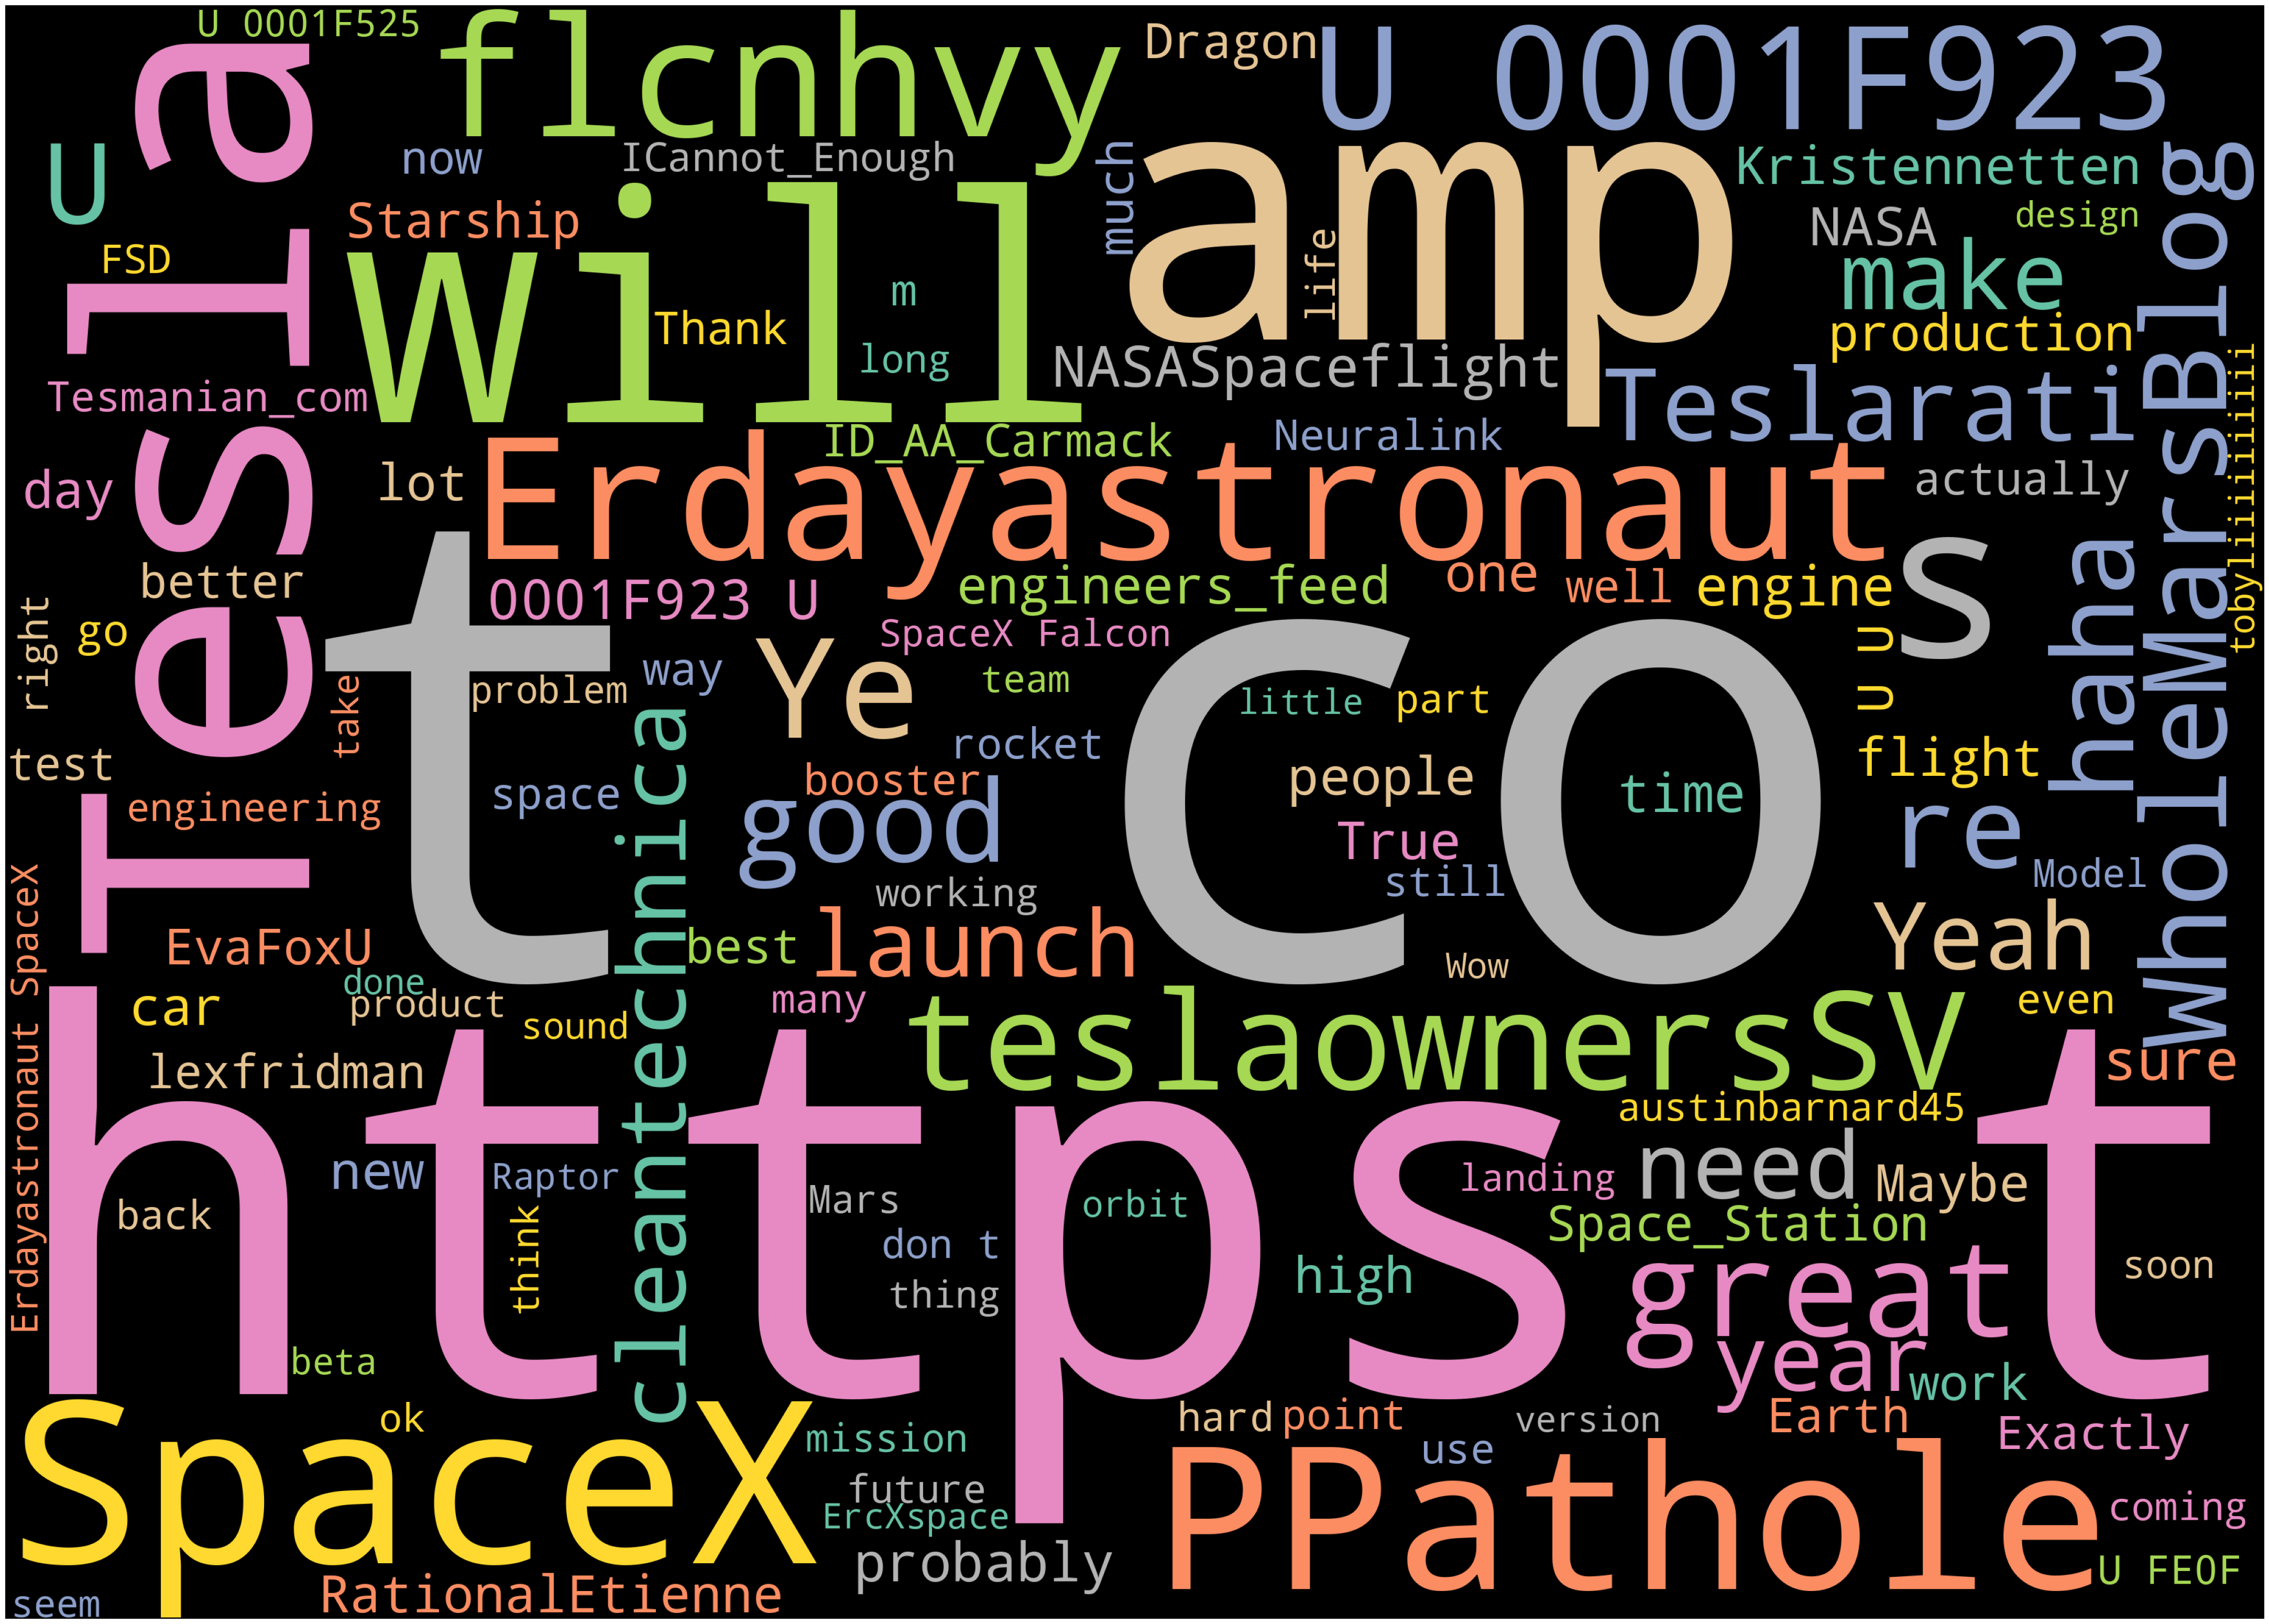

In [59]:
wordcloud= WordCloud(width=3500,
                     height=2500,
                     background_color='black',
                     max_words=120,
                     colormap='Set2').generate(text)
plot_cloud(wordcloud)

In [60]:
musk2=pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines=False)
musk2

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [61]:
musk2=musk2['Text']
musk2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [62]:
musk2=[x.strip() for x in musk2]
musk2=[x for x in musk2 if x]
musk2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [64]:
one_block=musk2[1]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [65]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [66]:
for token in doc_block[:]:
  print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [67]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs

['tracing', 'level', 'tried']

In [68]:
len(nouns_verbs)

3

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(nouns_verbs)
x

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [71]:
x.shape

(3, 3)

In [73]:
x.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [74]:
cv.get_feature_names_out()

array(['level', 'tracing', 'tried'], dtype=object)

In [75]:
temp_df=pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())
temp_df

level  tracing  tried
0      0        1      0
1      1        0      0
2      0        0      1

In [76]:
sum_words=x.sum(axis=0)
sum_words

matrix([[1, 1, 1]])

In [77]:
type(sum_words)

numpy.matrix

In [78]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [79]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [80]:
wf_df=pd.DataFrame({'word': cv.get_feature_names_out(),
                    'count': np.array(sum_words).flatten()})
wf_df

word  count
0    level      1
1  tracing      1
2    tried      1

**Visualizing results**

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

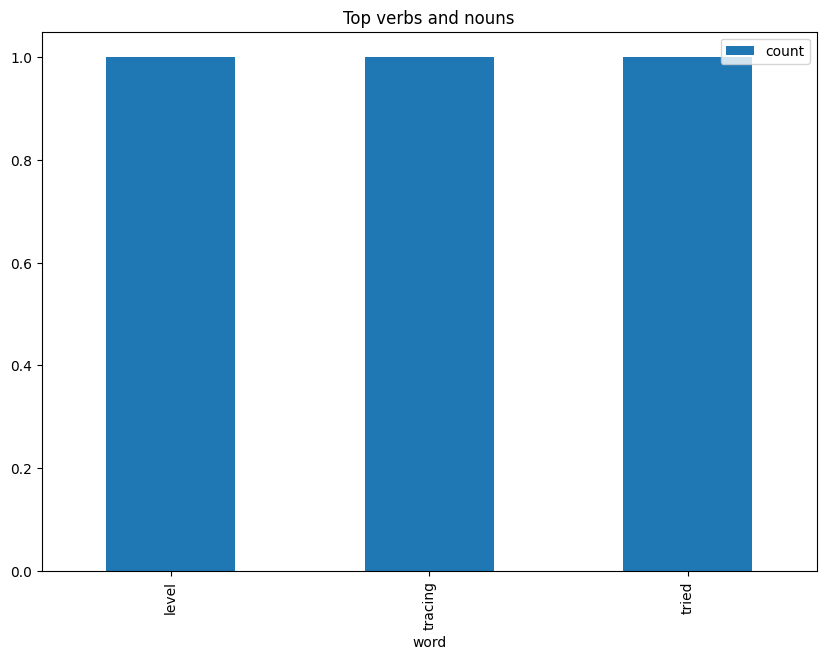

In [81]:
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

**Emotion Mining**

In [83]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [85]:
vee=pd.read_csv('Afinn.csv',
                 error_bad_lines=False,
                 sep=",",
                 encoding='latin-1')
vee

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [86]:
vee[1500:]

word  value
1500  masterpieces      4
1501        matter      1
1502       matters      1
1503        mature      2
1504    meaningful      2
...            ...    ...
2472         yucky     -2
2473         yummy      3
2474        zealot     -2
2475       zealots     -2
2476       zealous      2

[977 rows x 2 columns]

In [88]:
from nltk import tokenize
sentences=tokenize.sent_tokenize("".join(musk2))
sentences

['@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!',
 '!Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJo

In [89]:
sent_df=pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated@teslacn Congra...
4                    Now on to the next for even more!
..                                                 ...
857  Everything weve ever sensed or thought has be...
858  @kenyanwalstreet Not actually a payout, just a...
859  It may never pay out, as the stock cant b
 ht...
860  Details Aug 28.AI symbiosis while u wait@vista...
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...

[862 rows x 1 columns]

In [90]:
affinity_scores=vee.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [91]:
nlp=spacy.load('en_core_web_sm')

In [97]:
sentiment_lexicon=affinity_scores
def calculate_sentiment(text: str=None):
  sent_score=0
  if text:
       sentence=nlp(text)
       for word in sentence:
          sent_score += sentiment_lexicon.get(word.lemma_, 0)
  return sent_score

In [98]:
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [99]:
calculate_sentiment(text='wonderful session')

4

In [100]:
calculate_sentiment(text='great job, best explanation ever')

6

In [101]:
calculate_sentiment(text='good')

3

In [102]:
calculate_sentiment(text='What a ridiculous')

-3

In [103]:
calculate_sentiment(text='worst product and worst service ever')

-6

In [105]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

In [106]:
sent_df

sentence  sentiment_value
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0
1                                   Have you tried it?                0
2                  @joerogan @Spotify Great interview!                3
3    @gtera27 Doge is underestimated@teslacn Congra...                4
4                    Now on to the next for even more!                0
..                                                 ...              ...
857  Everything weve ever sensed or thought has be...                2
858  @kenyanwalstreet Not actually a payout, just a...                0
859  It may never pay out, as the stock cant b
 ht...               -4
860  Details Aug 28.AI symbiosis while u wait@vista...               -2
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...                0

[862 rows x 2 columns]

In [107]:
sent_df.iloc[4,0]

'Now on to the next for even more!'

In [108]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated@teslacn Congra...                4   
4                    Now on to the next for even more!                0   
..                                                 ...              ...   
857  Everything weve ever sensed or thought has be...                2   
858  @kenyanwalstreet Not actually a payout, just a...                0   
859  It may never pay out, as the stock cant b
 ht...               -4   
860  Details Aug 28.AI symbiosis while u wait@vista...               -2   
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...                0   

     word_count  
0            12  
1             4  
2             4  
3            12  
4             8  
..          ...  
857          15  
858          11  
859          30  
860          46  
861          13  

[862 rows x 3 columns]

In [109]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
790  Giving each person money allows them to decid
...                9   
39   @thejackbeyer @NASASpaceflight Cryoproof, then...                9   
528  SN9 next month.Starship SN8 with rear body fla...               10   
614  Its not useful for predicting the future, nor...               10   
674  We just havent observed the
 https://t.co/mez...               12   
170  Also, w
 https://t.co/IYdKttVsqk@cleantechnica...               12   
607  Its
 https://t.co/IxhyT6NuiC@Teslarati Tesla ...               13   
554  The open areas
 https://t.co/rabjKrtQlw@Save...               14   
33   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               14   
99   @Erdayastronaut @SpaceX Was also thinking that...               16   

     word_count  
790          45  
39           71  
528          72  
614         116  
674          61  
170          92  
607          60  
554         129  
33          203  
99           89

In [110]:
sent_df.sort_values(by='sentiment_value').head(15)

sentence  sentiment_value  \
59   Also, the road to hell is mostly paved with ba...               -7   
827  This is primarily an electrical/electronic (ch...               -7   
609  Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...               -6   
332  Austin jobs now avaihttps://t.co/d0i2w8wNKGYes...               -4   
859  It may never pay out, as the stock cant b
 ht...               -4   
638  Occasional flights from land are ok, but frequ...               -4   
576  Then static fire, checkouts, static fire, fly ...               -4   
472  @tesladri @ChananBos @raytech247 @WholeMarsBlo...               -3   
698  @TimFernholz So why is this madness acceptable...               -3   
453  Pretty odd
 https://t.co/PPSorKWdI8@enn_nafnla...               -3   
452  He plays the poor inventor card, but was ric...               -3   
720  Latter also s
 https://t.co/dlMy5rybrK@NASASpa...               -3   
264  Production/testing of rocket engines is over 9...               -3   
418  We also have to consider population life-month...               -3   
277  No symptoms for past few days, apart from fati...               -3   

     word_count  
59           11  
827          72  
609          56  
332          10  
859          30  
638          36  
576          12  
472          36  
698          10  
453          73  
452          33  
720         115  
264          20  
418          45  
277           9

In [111]:
sent_df['sentiment_value'].describe()

count    862.000000
mean       1.163573
std        2.480103
min       -7.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [112]:
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
0  @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0   
1                                 Have you tried it?                0   
4                  Now on to the next for even more!                0   
6  https://t.co/9WFKMYu2ojFrodo was the underdoge...               -2   
9  https://t.co/3pWt@ajtourville Yes@BLKMDL3 @Rat...               -1   

   word_count  
0          12  
1           4  
4           8  
6          13  
9          25

In [113]:
sent_df[sent_df['sentiment_value']<-5]

sentence  sentiment_value  \
59   Also, the road to hell is mostly paved with ba...               -7   
609  Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...               -6   
827  This is primarily an electrical/electronic (ch...               -7   

     word_count  
59           11  
609          56  
827          72

In [114]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

59     Also, the road to hell is mostly paved with ba...
609    Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...
827    This is primarily an electrical/electronic (ch...
Name: sentence, dtype: object

In [115]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q@justpaulinelol It\x92s too embarrassingJust learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F>@ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv@l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'This is primarily an electrical/electronic (chip design)/me\x85 https://t.co/VMq2atdV5dRT @SpaceX: Targeting Monday, July 20 for Falcon 9 launch of ANASIS-II from SLC-40Solving high-volume, high-reliability, low-cost production problems is especially valuedIf you\x92ve solved hard problems with phones / wearables (sealing, signal processing, inductive charging, power mgmt,\x85 https://t.co/rq3AWMZxvo@serhatserhatst Many@PPathole Summarizes pretty much every biz school case st

In [116]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [117]:
sent_df['index']=range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

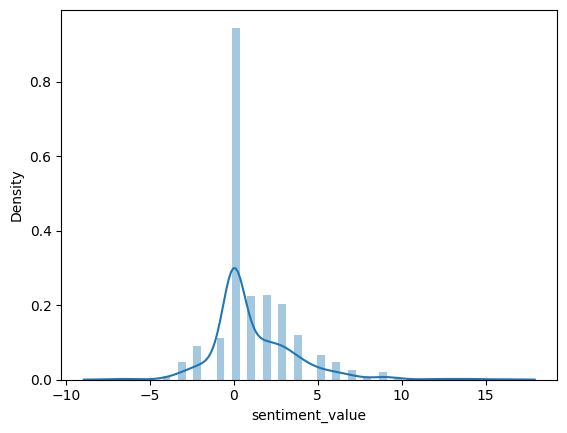

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

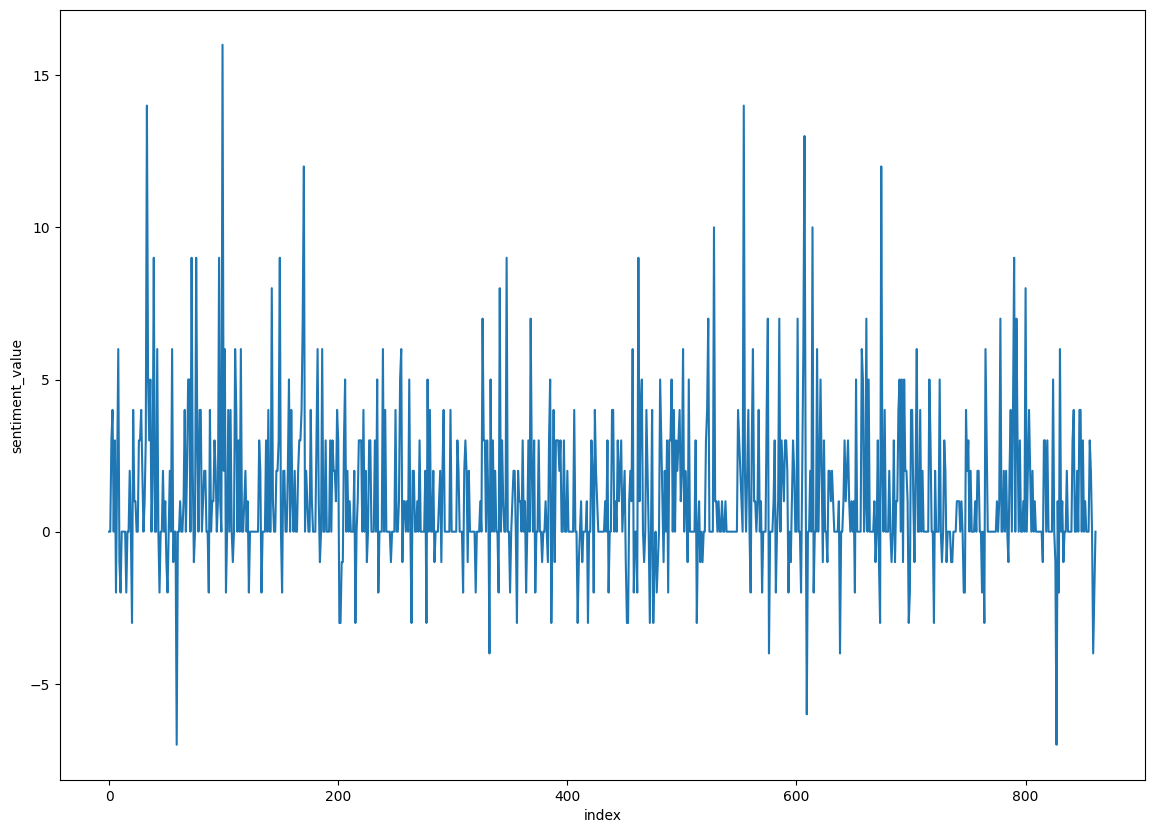

In [120]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value', x='index', data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

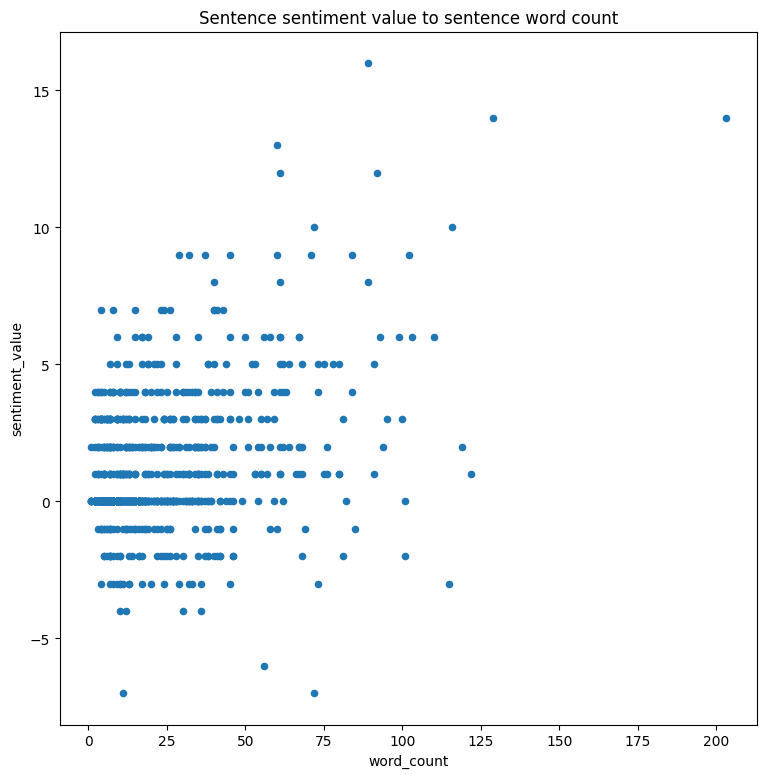

In [122]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [123]:
from google.colab import files
uploaded=files.upload()

Saving positive-words.txt to positive-words.txt


In [126]:
pw=pd.read_csv('positive-words.txt', error_bad_lines=False)
pw

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                           
1                           ; Opinion Lexicon: Positive                          
2                                                     ;                          
3     ; This file contains a list of POSITIVE opinio...                          
4                                                     ;                          
...                                                 ...                          
2026                                           youthful                          
2027                                               zeal                          
2028                                             zenith                          
2029                                               zest                          
2030                                              zippy                          

[2031 rows x 1 columns]

In [125]:
from google.colab import files
uploaded=files.upload()

Saving negative-words.txt to negative-words.txt


In [127]:
nw=pd.read_csv('negative-words.txt', error_bad_lines=False, encoding='latin-1')
nw

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0                                                    ;                             
1                           ; Opinion Lexicon: Negative                            
2                                                     ;                            
3     ; This file contains a list of NEGATIVE opinio...                            
4                                                     ;                            
...                                                 ...                            
4803                                               zaps                            
4804                                             zealot                            
4805                                            zealous                            
4806                                          zealously                            
4807                                             zombie                            

[4808 rows x 1 columns]

In [128]:
pw =pw.iloc[25:]
pw =pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
pw.reset_index(inplace=True)
pw =pw.drop('index',axis=1)
pw['Score'] = 1
pw

Words  Score
0            a+      1
1        abound      1
2       abounds      1
3     abundance      1
4      abundant      1
...         ...    ...
2001   youthful      1
2002       zeal      1
2003     zenith      1
2004       zest      1
2005      zippy      1

[2006 rows x 2 columns]

In [129]:
nw = nw.iloc[25:]
nw = nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
nw.reset_index(inplace=True)
nw = nw.drop('index',axis=1)
nw['Score'] = -1
nw

Words  Score
0        2-faced     -1
1        2-faces     -1
2       abnormal     -1
3        abolish     -1
4     abominable     -1
...          ...    ...
4778        zaps     -1
4779      zealot     -1
4780     zealous     -1
4781   zealously     -1
4782      zombie     -1

[4783 rows x 2 columns]

In [130]:
affinity_scores1=pw.set_index('Words')['Score'].to_dict()
affinity_scores2=nw.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [132]:
sentiment_lexicon=affinity_scores
def calculate_sentiment(text: str=None):
  sent_score=0
  if text:
     sentence=nlp(text)
     for word in sentence:
         sent_score += sentiment_lexicon.get(word.lemma_, 0)
  return sent_score

In [135]:
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)

In [136]:
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated@teslacn Congra...                4   
4                    Now on to the next for even more!                0   
..                                                 ...              ...   
857  Everything weve ever sensed or thought has be...                2   
858  @kenyanwalstreet Not actually a payout, just a...                0   
859  It may never pay out, as the stock cant b
 ht...               -4   
860  Details Aug 28.AI symbiosis while u wait@vista...               -2   
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...                0   

     word_count  index  
0            12      0  
1             4      1  
2             4      2  
3            12      3  
4             8      4  
..          ...    ...  
857          15    857  
858          11    858  
859          30    859  
860          46    860  
861          13    861  

[862 rows x 4 columns]

In [138]:
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)

In [139]:
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated@teslacn Congra...                4   
4                    Now on to the next for even more!                0   
..                                                 ...              ...   
857  Everything weve ever sensed or thought has be...                2   
858  @kenyanwalstreet Not actually a payout, just a...                0   
859  It may never pay out, as the stock cant b
 ht...               -4   
860  Details Aug 28.AI symbiosis while u wait@vista...               -2   
861  @TeslaGong @PPathole Samwise Gamgee@PPathole A...                0   

     word_count  index  
0            12      0  
1             4      1  
2             4      2  
3            12      3  
4             8      4  
..          ...    ...  
857          15    857  
858          11    858  
859          30    859  
860          46    860  
861          13    861  

[862 rows x 4 columns]

In [140]:
sent_df.sort_values(by='sentiment_value').tail()

sentence  sentiment_value  \
170  Also, w
 https://t.co/IYdKttVsqk@cleantechnica...               12   
607  Its
 https://t.co/IxhyT6NuiC@Teslarati Tesla ...               13   
554  The open areas
 https://t.co/rabjKrtQlw@Save...               14   
33   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               14   
99   @Erdayastronaut @SpaceX Was also thinking that...               16   

     word_count  index  
170          92    170  
607          60    607  
554         129    554  
33          203     33  
99           89     99

In [141]:
sent_df.sort_values(by='sentiment_value').head()

sentence  sentiment_value  \
59   Also, the road to hell is mostly paved with ba...               -7   
827  This is primarily an electrical/electronic (ch...               -7   
609  Very ba
 https://t.co/tJsh1Exz1Q@justpaulinelo...               -6   
332  Austin jobs now avaihttps://t.co/d0i2w8wNKGYes...               -4   
859  It may never pay out, as the stock cant b
 ht...               -4   

     word_count  index  
59           11     59  
827          72    827  
609          56    609  
332          10    332  
859          30    859

In [142]:
sent_df['sentiment_value'].describe()

count    862.000000
mean       1.163573
std        2.480103
min       -7.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [143]:
sent_df[sent_df['sentiment_value']<0].head()

sentence  sentiment_value  \
6   https://t.co/9WFKMYu2ojFrodo was the underdoge...               -2   
9   https://t.co/3pWt@ajtourville Yes@BLKMDL3 @Rat...               -1   
10  However, if we don
 https://t.co/9Z8Ac6skqx@Ra...               -2   
15  Thats what youre missing.Back to work I go@C...               -2   
20  https://t.co/UEEocOfcTbThe people have spoken ...               -3   

    word_count  index  
6           13      6  
9           25      9  
10          38     10  
15          37     15  
20          32     20

In [144]:
sent_df[sent_df['sentiment_value']<-1]

sentence  sentiment_value  \
6    https://t.co/9WFKMYu2ojFrodo was the underdoge...               -2   
10   However, if we don
 https://t.co/9Z8Ac6skqx@Ra...               -2   
15   Thats what youre missing.Back to work I go@C...               -2   
20   https://t.co/UEEocOfcTbThe people have spoken ...               -3   
44   Would be better to have small fees than no fee...               -2   
..                                                 ...              ...   
764     Connector damaged in the storm, but fixed now.               -3   
827  This is primarily an electrical/electronic (ch...               -7   
829  Not moving fast enough.ThanksJust stop@EvaFoxU...               -2   
859  It may never pay out, as the stock cant b
 ht...               -4   
860  Details Aug 28.AI symbiosis while u wait@vista...               -2   

     word_count  index  
6            13      6  
10           38     10  
15           37     15  
20           32     20  
44           46     44  
..          ...    ...  
764           8    764  
827          72    827  
829          42    829  
859          30    859  
860          46    860  

[62 rows x 4 columns]

In [145]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

6      https://t.co/9WFKMYu2ojFrodo was the underdoge...
10     However, if we don
 https://t.co/9Z8Ac6skqx@Ra...
15     Thats what youre missing.Back to work I go@C...
20     https://t.co/UEEocOfcTbThe people have spoken ...
44     Would be better to have small fees than no fee...
51     Car guesses drive direction based on what obst...
59     Also, the road to hell is mostly paved with ba...
87     Ship is held down by massive pins while engine...
102    A large solar field or reactor is needed for p...
122    @harsimranbansal Literally@tobyliiiiiiiiii Are...
133    Stop the sneaky moves, Charlie Ergen!Entertain...
151                        What could possibly go wrong?
201    @RGVaerialphotos It will be real soon@MarcusHo...
202    External
 https://t.co/csIZk6sEVu@bcart03 @nex...
215    @RationalEtienne @MarcusHouseGame Not yet@Star...
235                         They stole Apples code too.
264    Production/testing of rocket engines is over 9...
277    No symptoms for past few

In [147]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'However, if we don\x85 https://t.co/9Z8Ac6skqx@RationalEtienne @Adamklotz_ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or\x85 https://t.co/7J1c92hdjl@ID_AA_Carmack Lowest cost per ton of carbon sequestered, net of value of any product made.',
 'That\x92s what you\x92re missing.Back to work I go@CapybaraSurfer @MattWallace888 Does seem a bit high@itsALLrisky Doge appears to be inflationary, but is not meaningfully so (fixed # of coins per unit time), whereas\x85 https://t.co/4UH4rARC6T@MichaelGalanin @kevinmgill Wow@Erdayastronaut @michaelhodapp_ 1.',
 'https://t.co/UEEocOfcTbThe people have spoken \x85 https://t.co/x41oVMzTGo@Nivetha_7_42 @lexfridman So cute <U+0001F495>@UniverCurious Extremely misleading image, as doesn\x92t reflect true time cost to people or rain &amp; pain<U+0001F3B6> Who let the Doge out <U+0001F3B6>Hodl the rainforests!',


In [148]:
sent_df['index']=range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

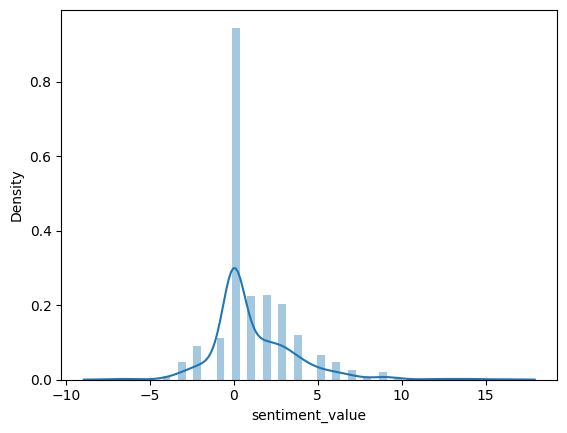

In [149]:
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

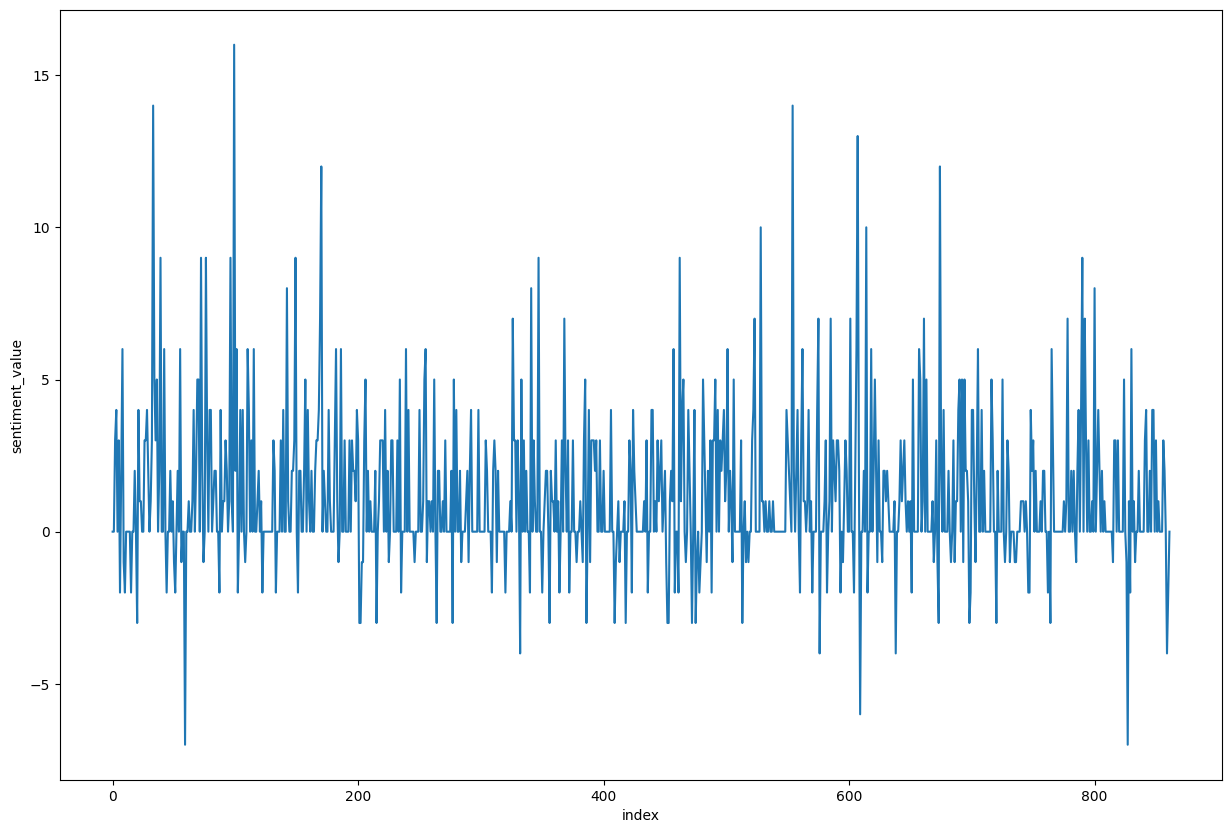

In [150]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value', x='index', data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

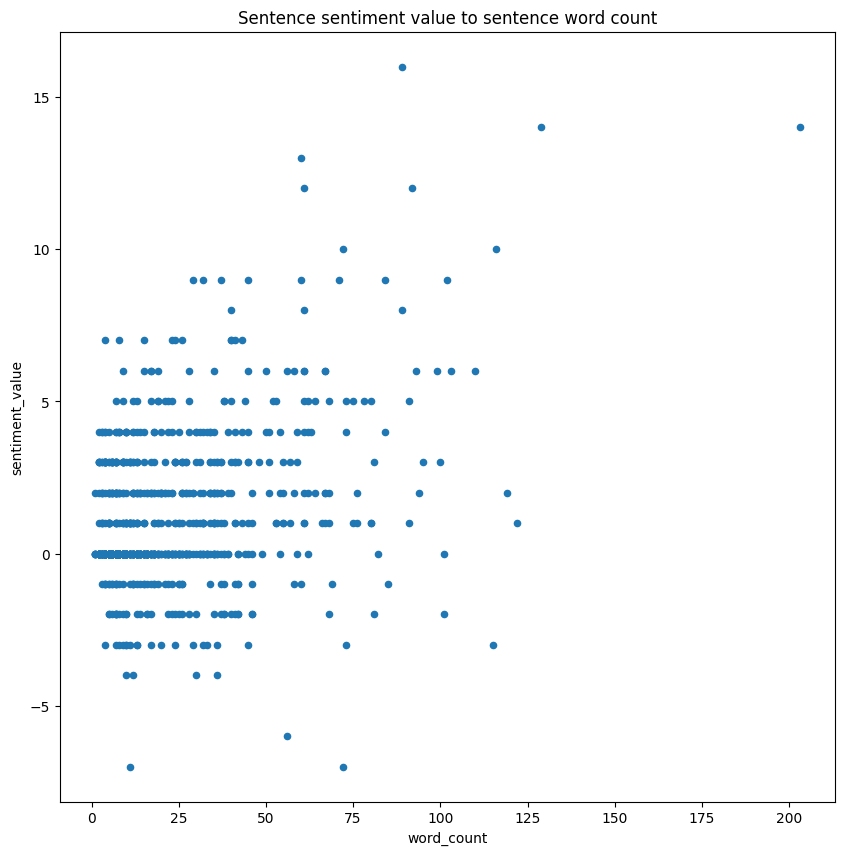

In [151]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')

**Positive and Negative words can't give us better results for sentimental analysis as compared to vee(afinn dataset) which gives us better analysis**